In [1]:
import pandas as pd

df_stck = pd.read_feather("data/stack_overflow.feather")
df_stck['job_sat'].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

<Axes: xlabel='converted_comp', ylabel='job_sat'>

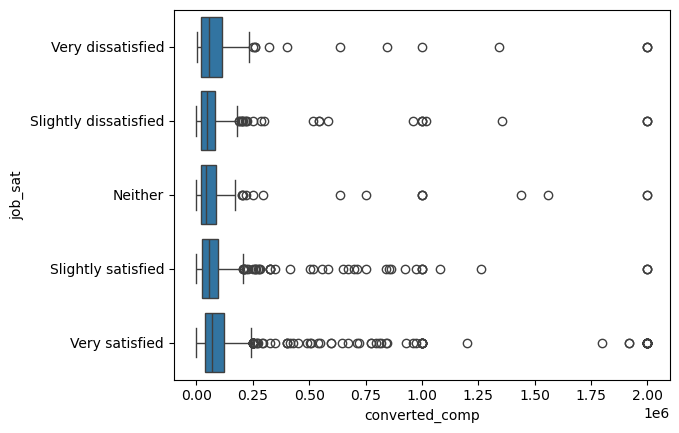

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="converted_comp",y="job_sat", data=df_stck)

In [5]:
!pip install pingouin

In [7]:
import pingouin

pingouin.anova(data=df_stck, dv='converted_comp', between='job_sat')

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


In [9]:
pingouin.pairwise_tests(data=df_stck, dv='converted_comp', between='job_sat',padjust='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931


In [13]:
pingouin.pairwise_tests(data=df_stck,dv='converted_comp',between='job_sat',padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


In [23]:
alpha=0.01
df_stck['age_cat'].value_counts(normalize=True)

age_cat
Under 30       0.535604
At least 30    0.464396
Name: proportion, dtype: float64

In [59]:
p_hat=(df_stck['age_cat'] == "Under 30").mean()
p_hat

0.5356037151702786

In [61]:
p_0=0.5

In [63]:
n=len(df_stck)
n

2261

In [65]:
import numpy as np

pay = p_hat - p_0
payda = np.sqrt(p_0 * (1 - p_0) / n)
z_score = pay/payda
z_score

3.385911440783663

In [67]:
from scipy.stats import norm

p_value = 2 * (1 - norm.cdf(z_score))
p_value

0.0007094227368100725

In [69]:
p_value < alpha

True

In [ ]:
#h0 reddettik yani değerlerin %50sinden fazlası 30 yaşının altındaymış

In [72]:
alpha=0.05

In [74]:
p_hats = df_stck.groupby('age_cat')['hobbyist'].value_counts(normalize=True)
p_hats

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: proportion, dtype: float64

In [76]:
n = df_stck.groupby('age_cat')['hobbyist'].count()
n

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

In [78]:
p_hat_at_least_30 = p_hats[('At least 30', 'Yes')]
p_hat_at_under_30 = p_hats[('Under 30', 'Yes')]

(p_hat_at_least_30, p_hat_at_under_30)

(0.7733333333333333, 0.8431048720066061)

In [84]:
n_at_least_30 = n['At least 30']
n_at_under_30 = n['Under 30']
(n_at_least_30,n_at_under_30)

(1050, 1211)

In [86]:
import numpy as np
p_hat = (n_at_least_30 * p_hat_at_least_30 + n_at_under_30 * p_hat_at_under_30) / \
(n_at_least_30 + n_at_under_30)

std_error = np.sqrt(p_hat * (1 - p_hat) / n_at_least_30 +
                    p_hat * (1 - p_hat) / n_at_under_30)

z_score = (p_hat_at_least_30 - p_hat_at_under_30) / std_error

z_score

-4.223691463320559

In [88]:
p_value = 2 * (1 - norm.cdf(z_score))
p_value

1.9999759666985732

In [90]:
p_value<alpha

False

In [94]:
n_hobbyist = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])

from statsmodels.stats.proportion import proportions_ztest

z_score, p_value = proportions_ztest(count=n_hobbyist, nobs=n_rows, 
                                     alternative='two-sided')

(z_score,p_value)

(-4.223691463320559, 2.403330142685068e-05)

True

In [98]:
import pingouin

expected, observed, stats = pingouin.chi2_independence(data=df_stck, x='hobbyist', 
                                                       y='age_cat', 
                                                       correction=False)

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,17.839570,1.0,0.000024,0.088826,0.988205
1,cressie-read,0.666667,17.818114,1.0,0.000024,0.088773,0.988126
2,log-likelihood,0.000000,17.802653,1.0,0.000025,0.088734,0.988069
3,freeman-tukey,-0.500000,17.815060,1.0,0.000024,0.088765,0.988115
4,mod-log-likelihood,-1.000000,17.848099,1.0,0.000024,0.088848,0.988236
5,neyman,-2.000000,17.976656,1.0,0.000022,0.089167,0.988694


In [100]:
props = df_stck.groupby('job_sat')['age_cat'].value_counts(normalize=True)
props

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13348\384739958.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  props = df_stck.groupby('job_sat')['age_cat'].value_counts(normalize=True)


job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: proportion, dtype: float64

In [102]:
wide_props = props.unstack()
wide_props

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,0.490566,0.509434
Slightly dissatisfied,0.467836,0.532164
Neither,0.432836,0.567164
Slightly satisfied,0.435294,0.564706
Very satisfied,0.488055,0.511945


<Axes: xlabel='job_sat'>

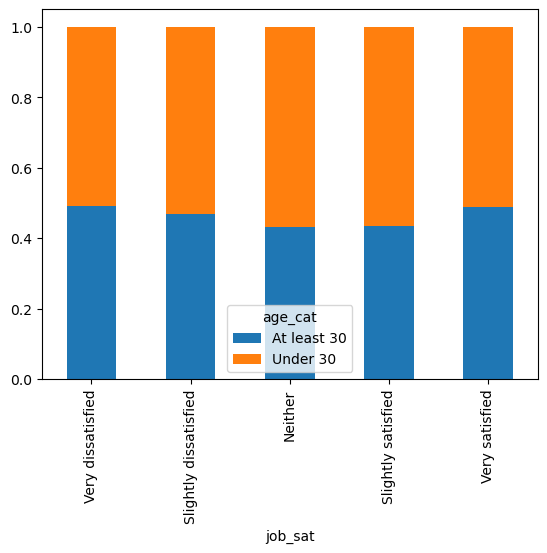

In [104]:
wide_props.plot(kind='bar', stacked=True)

In [106]:
expected, observed, stats = pingouin.chi2_independence(data=df_stck, x='job_sat', 
                                                       y='age_cat')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


<Axes: xlabel='age_cat'>

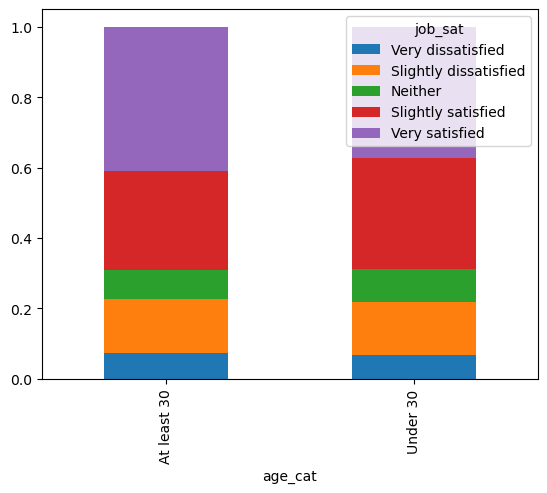

In [108]:
props = df_stck.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked=True)

In [110]:
expected, observed, stats = pingouin.chi2_independence(data=df_stck, x='age_cat',
                                                       y='job_sat')
stats[stats['test'] == 'pearson']

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,5.552373,4.0,0.235164,0.049555,0.437417


In [112]:
purple_link_counts = df_stck['purple_link'].value_counts()
purple_link_counts

purple_link
Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: count, dtype: int64

In [114]:
purple_link_counts = purple_link_counts.rename_axis('purple_link').\
                                        reset_index(name='n').\
                                        sort_values('purple_link')

purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [116]:
hypothesized = pd.DataFrame({
    'purple_link' : ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
    'prop' : [1/6, 1/6, 1/2, 1/6]
}
)
hypothesized

,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,"Hello, old friend",0.500000
3,Indifferent,0.166667


In [118]:
#  Kategoriye göre varsayılan sayılar
# Purple_link dağılımını görselleştirmek için, 
# her bir yanıt için varsayılan sayıların bulunması yardımcı olacaktır. 
# Bu sayılar, varsayılan oranların örneklemdeki 
# toplam gözlem sayısıyla çarpılmasıyla hesaplanır.
n_total = len(df_stck)
hypothesized['n'] = hypothesized['prop'] * n_total
hypothesized

,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


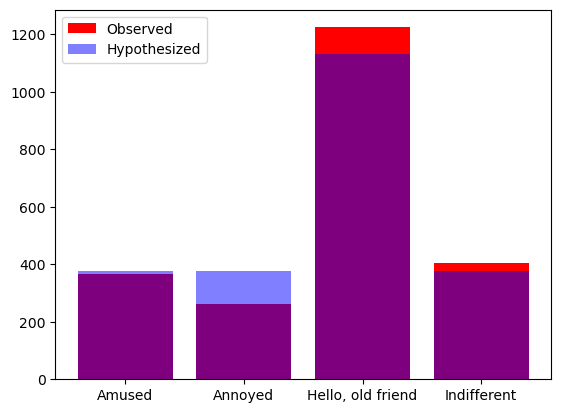

In [120]:
import matplotlib.pyplot as plt

plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], 
        color='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], 
        alpha=0.5, color='blue', label='Hypothesized')
plt.legend()

In [122]:
from scipy.stats import chisquare

chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n'])

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)